<a href="https://colab.research.google.com/github/nishakumari002/Speech_Emotion_Recognition/blob/main/Speech_Emotion_Recoginition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

In [2]:
import os
os.environ['KAGGLE_CONFIG_DIR']='/content/drive/MyDrive/kaggle'

In [3]:
%cd /content/drive/MyDrive/kaggle

/content/drive/MyDrive/kaggle


In [4]:
!kaggle datasets download -d ejlok1/toronto-emotional-speech-set-tess

Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 5, in <module>
    from kaggle.cli import main
  File "/usr/local/lib/python3.10/dist-packages/kaggle/__init__.py", line 23, in <module>
    api.authenticate()
  File "/usr/local/lib/python3.10/dist-packages/kaggle/api/kaggle_api_extended.py", line 403, in authenticate
    raise IOError('Could not find {}. Make sure it\'s located in'
OSError: Could not find kaggle.json. Make sure it's located in /content/drive/MyDrive/kaggle. Or use the environment method.


In [5]:
import numpy as np
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
import librosa
import librosa.display
from IPython.display import Audio
import warnings
warnings.filterwarnings('ignore')

In [6]:
paths=[]
labels=[]
for dirname, _, filenames in os.walk('/content/drive/MyDrive/kaggle'):
    for filename in filenames:
        paths.append(os.path.join(dirname, filename))
        label=filename.split('_')[-1]
        label=label.split('.')[0]
        labels.append(label.lower())
print('Dataset is Loaded')

Dataset is Loaded


In [7]:

len(paths)

5600

In [8]:
paths[:5]

['/content/drive/MyDrive/kaggle/TESS Toronto emotional speech set data/OAF_Fear/OAF_back_fear.wav',
 '/content/drive/MyDrive/kaggle/TESS Toronto emotional speech set data/OAF_Fear/OAF_bar_fear.wav',
 '/content/drive/MyDrive/kaggle/TESS Toronto emotional speech set data/OAF_Fear/OAF_base_fear.wav',
 '/content/drive/MyDrive/kaggle/TESS Toronto emotional speech set data/OAF_Fear/OAF_bean_fear.wav',
 '/content/drive/MyDrive/kaggle/TESS Toronto emotional speech set data/OAF_Fear/OAF_bite_fear.wav']

In [9]:
labels[:5]

['fear', 'fear', 'fear', 'fear', 'fear']

In [10]:
#create a dataframe
df=pd.DataFrame()
df['speech']=paths
df['label']=labels
df.head()

,speech,label
0,/content/drive/MyDrive/kaggle/TESS Toronto emo...,fear
1,/content/drive/MyDrive/kaggle/TESS Toronto emo...,fear
2,/content/drive/MyDrive/kaggle/TESS Toronto emo...,fear
3,/content/drive/MyDrive/kaggle/TESS Toronto emo...,fear
4,/content/drive/MyDrive/kaggle/TESS Toronto emo...,fear


In [11]:
df['label'].value_counts()

fear       800
ps         800
sad        800
angry      800
disgust    800
happy      800
neutral    800
Name: label, dtype: int64

In [12]:
labels = np.array(df['label'].value_counts().index)

***Exploratory Data Analysis***

In [13]:
#import seaborn as sns
#sns.countplot(df['label'])

In [14]:
print(df['label'].dtype)

object


In [15]:
print(df['label'].unique())

['fear' 'ps' 'sad' 'angry' 'disgust' 'happy' 'neutral']


In [16]:
df['label'] = df['label'].astype('category')

<Axes: xlabel='label', ylabel='count'>

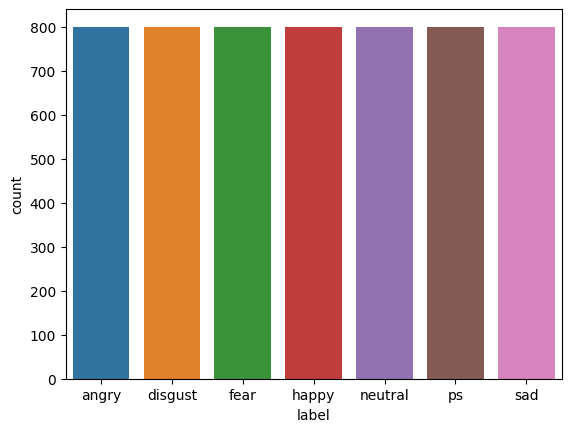

In [17]:
import seaborn as sns
sns.countplot(data=df, x='label')

In [18]:
def waveplot(data, sr, emotion):
    plt.figure(figsize=(10,4))
    plt.title(emotion, size=20)
    librosa.display.waveplot(data, sr=sr)
    plt.show()

def spectogram(data, sr, emotion):
     x = librosa.stft(data)
     xdb = librosa.amplitude_to_db(abs(x))
     plt.figure(figsize=(11,4))
     plt.title(emotion, size=20)
     librosa.display.specshow(xdb, sr=sr, x_axis='time', y_axis='hz')
     plt.colorbar()

In [19]:
!pip install --upgrade librosa

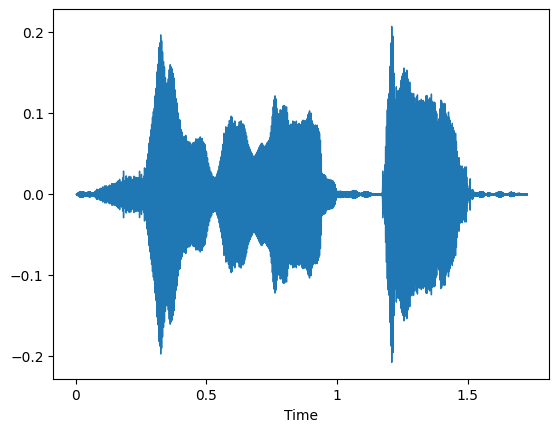

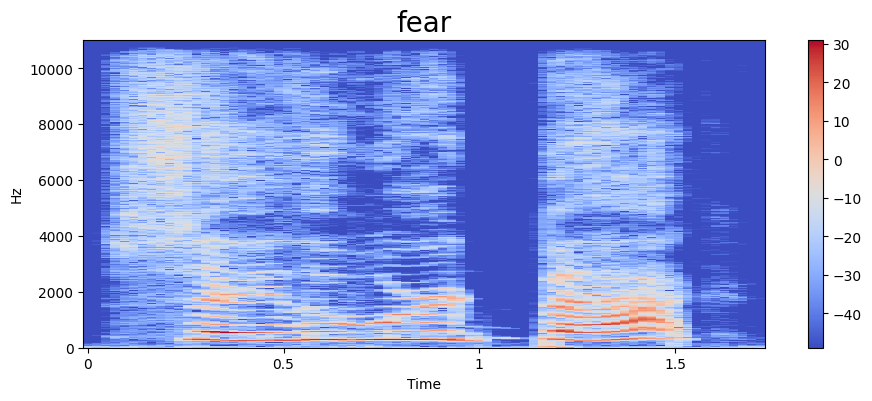

In [20]:
emotion = 'fear'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)

#display the wave of the audio file
librosa.display.waveshow(data)

#display the spectogram of audio file
spectogram(data, sampling_rate, emotion)
Audio(path)

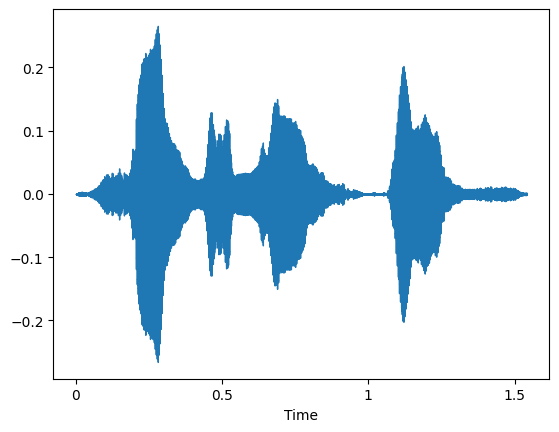

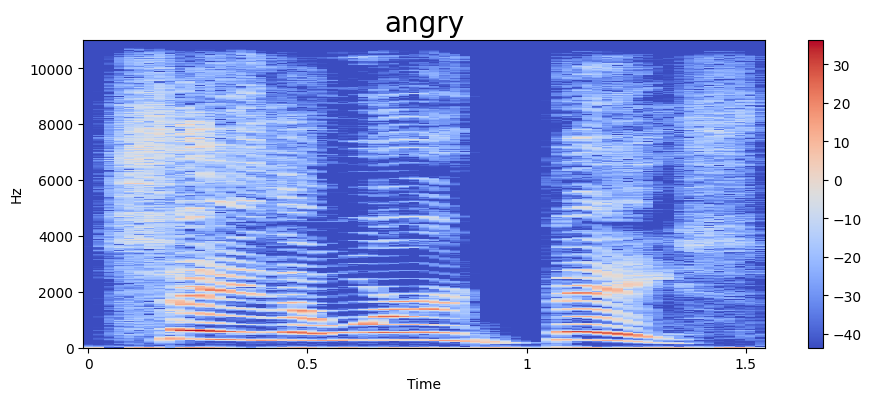

In [21]:
emotion = 'angry'
path = np.array(df['speech'][df['label']==emotion])[1]
data, sampling_rate = librosa.load(path)
librosa.display.waveshow(data)
spectogram(data, sampling_rate, emotion)
Audio(path)

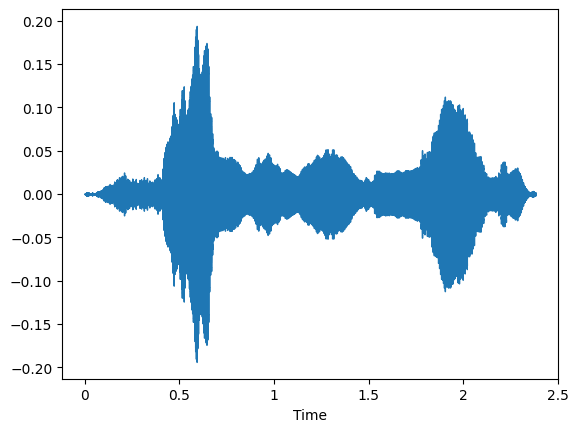

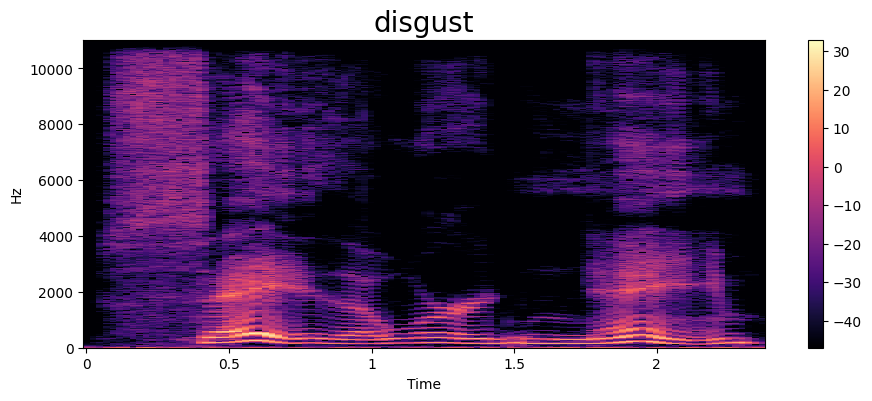

In [22]:
emotion = 'disgust'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
librosa.display.waveshow(data)
spectogram(data, sampling_rate, emotion)
Audio(path)

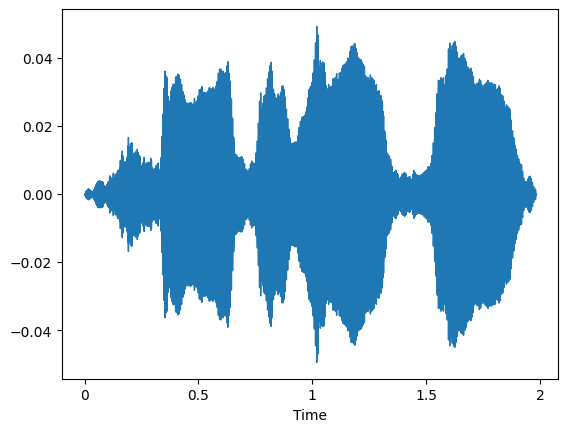

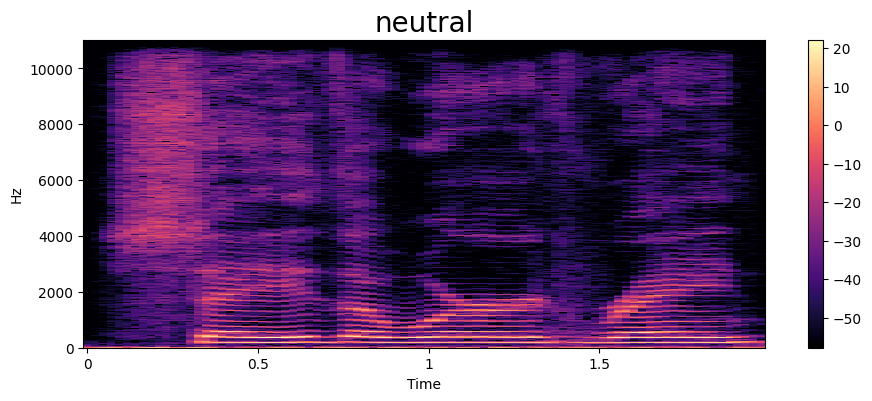

In [23]:
emotion = 'neutral'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
librosa.display.waveshow(data)
spectogram(data, sampling_rate, emotion)
Audio(path)

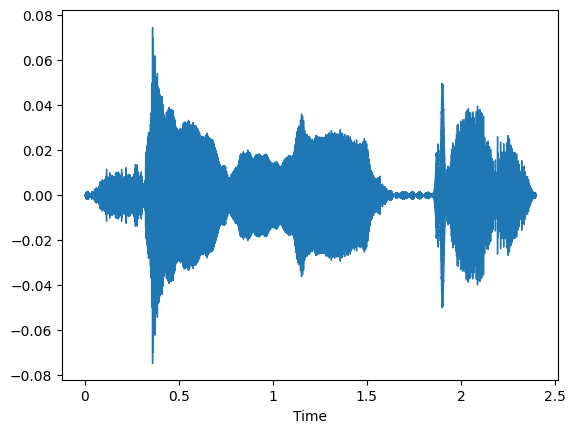

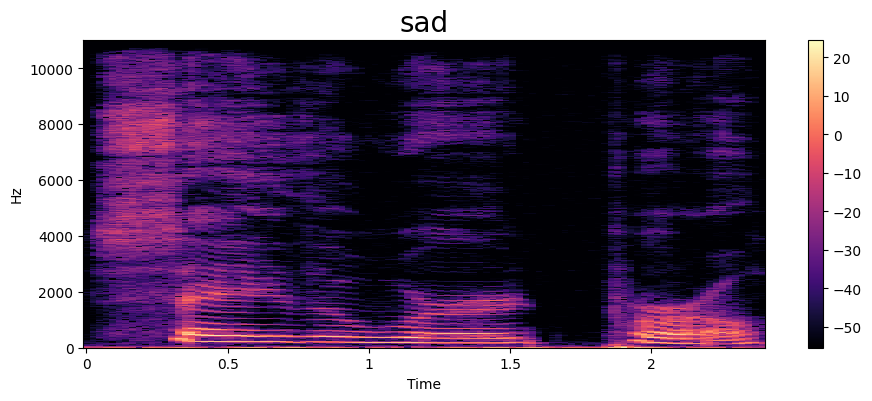

In [24]:
emotion = 'sad'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
librosa.display.waveshow(data)
spectogram(data, sampling_rate, emotion)
Audio(path)

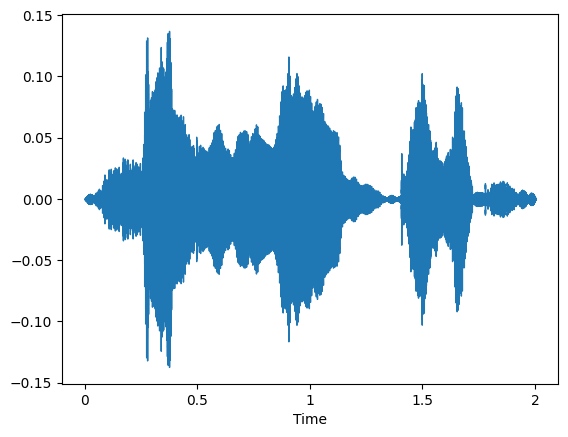

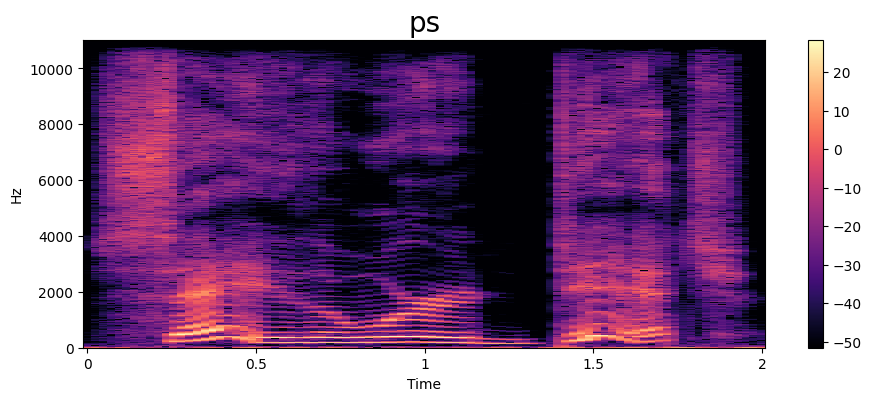

In [25]:
emotion = 'ps'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
librosa.display.waveshow(data)
spectogram(data, sampling_rate, emotion)
Audio(path)

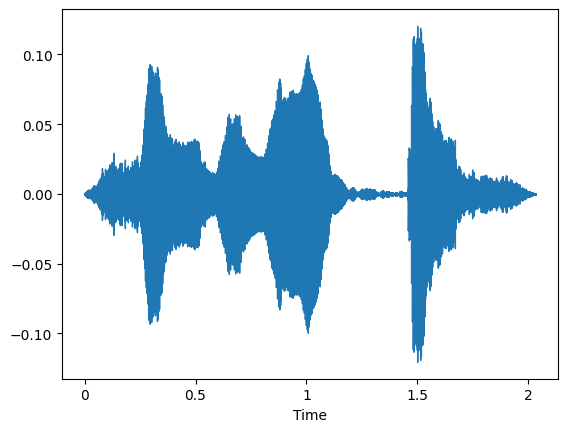

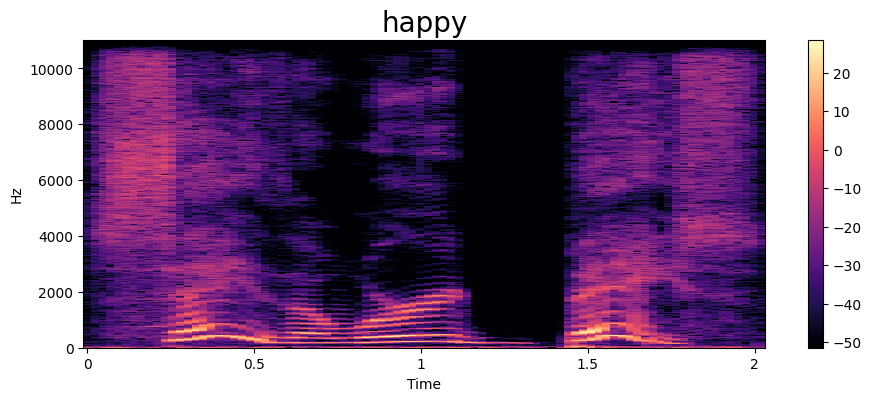

In [26]:
emotion = 'happy'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
librosa.display.waveshow(data)
spectogram(data, sampling_rate, emotion)
Audio(path)

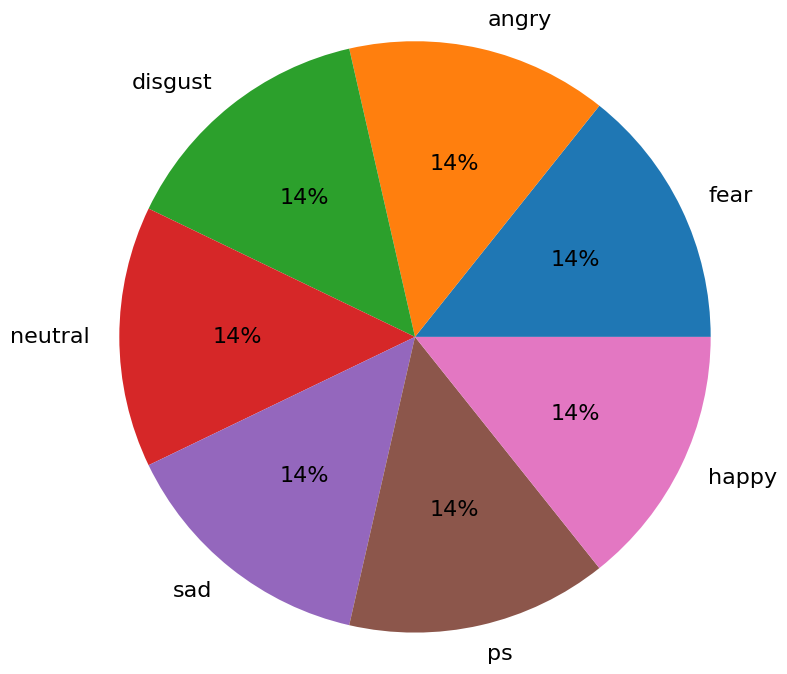

In [54]:
labels=["fear","angry","disgust","neutral","sad","ps","happy"]
plt.pie(df['label'].value_counts(), labels=labels, autopct='%.0f%%', radius=2, textprops={'fontsize':16})
plt.show()

***Feature Extraction***

In [27]:
# Audio feature extraction method
# Mel-frequency cepstral coefficients (MFCC)
# It extract audio feature

def extract_mfcc(filename):
     y, sr = librosa.load(filename, duration=3, offset=0.5)
     mfcc = np.mean(librosa.feature.mfcc(y=y, sr=sr, n_mfcc=40).T, axis=0)
     return mfcc

In [28]:
# display the MFCC of 0th index audio
extract_mfcc(df['speech'][0])

array([-4.4536740e+02,  9.1276093e+01, -5.8949256e-01, -1.7314268e+01,
        3.2114537e+00,  3.8689072e+00, -1.2856502e+01, -3.4997500e-02,
       -1.0514208e+01,  1.8963062e+00, -1.3004948e+01, -7.5758567e+00,
       -6.3761392e+00, -3.0671544e+00, -2.8966854e+00,  2.5014248e+00,
       -6.5666776e+00,  2.3161004e+00,  3.9002411e+00, -7.2122092e+00,
        6.1384773e+00,  1.8507450e+01,  1.5220100e+01,  2.9525787e+01,
        2.1546635e+01,  1.7631252e+01,  7.3770428e+00,  2.2608621e+00,
       -2.9354751e+00,  6.0986023e+00,  5.5288827e-01,  2.1243875e+00,
       -2.8407288e+00, -4.6624756e+00,  8.0207396e-01,  3.1533179e+00,
       -2.4966443e+00, -1.1518220e+00, -2.2240906e+00,  2.2110424e+00],
      dtype=float32)

In [34]:
X_mfcc = df['speech'].apply(lambda x: extract_mfcc(x))

In [35]:
X_mfcc

0       [-445.3674, 91.27609, -0.58949256, -17.314268,...
1       [-456.2984, 95.33353, 17.716852, -33.76581, -1...
2       [-461.2538, 56.51359, 13.97067, 2.563785, 8.11...
3       [-499.1559, 72.94784, 25.2297, 8.166257, 11.47...
4       [-467.65872, 87.91811, 14.29919, -15.605197, 3...
                              ...                        
5595    [-423.21027, 95.63426, 32.865875, 36.295815, -...
5596    [-413.1616, 101.093704, 26.34351, 32.963943, -...
5597    [-380.8945, 86.02678, 25.528904, 27.952293, -1...
5598    [-381.3396, 95.65286, 3.7482197, 29.567404, -4...
5599    [-393.75946, 86.17019, 17.15952, 27.942144, -1...
Name: speech, Length: 5600, dtype: object

In [36]:
X = [x for x in X_mfcc]
X = np.array(X)
X.shape

(5600, 40)

In [37]:
# convert the feature into 1 dimention
X = np.expand_dims(X, -1)
X.shape

(5600, 40, 1)

In [63]:
X_mfcc.describe()

count                                                  5600
unique                                                 5600
top       [-445.3674, 91.27609, -0.58949256, -17.314268,...
freq                                                      1
Name: speech, dtype: object

In [64]:
X_mfcc.corr

<bound method Series.corr of 0       [-445.3674, 91.27609, -0.58949256, -17.314268,...
1       [-456.2984, 95.33353, 17.716852, -33.76581, -1...
2       [-461.2538, 56.51359, 13.97067, 2.563785, 8.11...
3       [-499.1559, 72.94784, 25.2297, 8.166257, 11.47...
4       [-467.65872, 87.91811, 14.29919, -15.605197, 3...
                              ...                        
5595    [-423.21027, 95.63426, 32.865875, 36.295815, -...
5596    [-413.1616, 101.093704, 26.34351, 32.963943, -...
5597    [-380.8945, 86.02678, 25.528904, 27.952293, -1...
5598    [-381.3396, 95.65286, 3.7482197, 29.567404, -4...
5599    [-393.75946, 86.17019, 17.15952, 27.942144, -1...
Name: speech, Length: 5600, dtype: object>

In [65]:
# Fill NaN with 0
X_mfcc = X_mfcc.fillna(0)
print(X_mfcc.isna().any())
X_mfcc.shape

False


(5600,)

In [69]:
X_mfcc

0       [-445.3674, 91.27609, -0.58949256, -17.314268,...
1       [-456.2984, 95.33353, 17.716852, -33.76581, -1...
2       [-461.2538, 56.51359, 13.97067, 2.563785, 8.11...
3       [-499.1559, 72.94784, 25.2297, 8.166257, 11.47...
4       [-467.65872, 87.91811, 14.29919, -15.605197, 3...
                              ...                        
5595    [-423.21027, 95.63426, 32.865875, 36.295815, -...
5596    [-413.1616, 101.093704, 26.34351, 32.963943, -...
5597    [-380.8945, 86.02678, 25.528904, 27.952293, -1...
5598    [-381.3396, 95.65286, 3.7482197, 29.567404, -4...
5599    [-393.75946, 86.17019, 17.15952, 27.942144, -1...
Name: speech, Length: 5600, dtype: object

In [38]:
# Mapped label into numbers  example (sad -> 0 , happy -> 1)

from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder()
y = enc.fit_transform(df[['label']])
y= y.toarray()
y.shape

(5600, 7)

In [39]:
# show the label mapped values
label_index_mapping = {i: label for i, label in enumerate(enc.categories_[0])}
print(label_index_mapping)

{0: 'angry', 1: 'disgust', 2: 'fear', 3: 'happy', 4: 'neutral', 5: 'ps', 6: 'sad'}


***Create the LSTM Model***

In [40]:
{0: 'angry', 1: 'disgust', 2: 'fear', 3: 'happy', 4: 'neutral', 5: 'ps', 6: 'sad'}
# Neural network summary

from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout

model = Sequential([
    LSTM(256, return_sequences=False, input_shape=(40,1)),
    Dropout(0.2),
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(7, activation='softmax')
])

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 256)               264192    
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense (Dense)               (None, 128)               32896     
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dropout_2 (Dropout)         (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 7)                 4

***Splitting dataset for training and testing***

In [41]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [42]:
print(type(X_train))  # Should be <class 'numpy.ndarray'>
print(type(y_train))  # Should be <class 'numpy.ndarray'>

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [43]:
import numpy as np

X_train = np.array(X_train)
y_train = np.array(y_train)

In [44]:
# Train the model total 50 epochs
epoch = 5
history = model.fit(X_train, y_train, validation_split=0.2, epochs=epoch, batch_size=64)

Epoch 1/5
47/47 [==============================] - 11s 23ms/step - loss: 1.0843 - accuracy: 0.5838 - val_loss: 0.3812 - val_accuracy: 0.8868
Epoch 2/5
47/47 [==============================] - 0s 9ms/step - loss: 0.3432 - accuracy: 0.8850 - val_loss: 0.2174 - val_accuracy: 0.9214
Epoch 3/5
47/47 [==============================] - 0s 9ms/step - loss: 0.2161 - accuracy: 0.9350 - val_loss: 0.1876 - val_accuracy: 0.9348
Epoch 4/5
47/47 [==============================] - 0s 9ms/step - loss: 0.1775 - accuracy: 0.9437 - val_loss: 0.1534 - val_accuracy: 0.9481
Epoch 5/5
47/47 [==============================] - 0s 9ms/step - loss: 0.1537 - accuracy: 0.9550 - val_loss: 0.1426 - val_accuracy: 0.9574


***Plots the results***

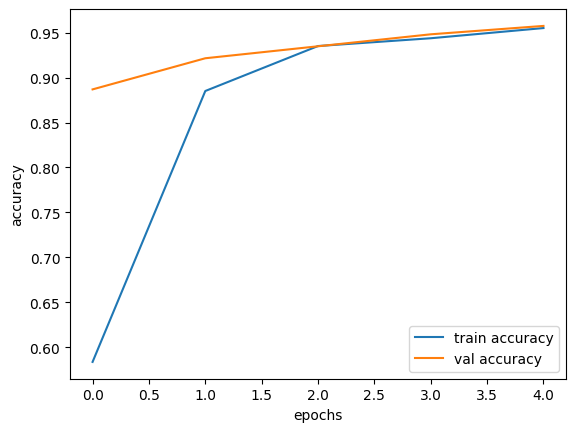

In [45]:
# Display the Train accuracy and validation accuracy graph
epochs = list(range(epoch))
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, label='train accuracy')
plt.plot(epochs, val_acc, label='val accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

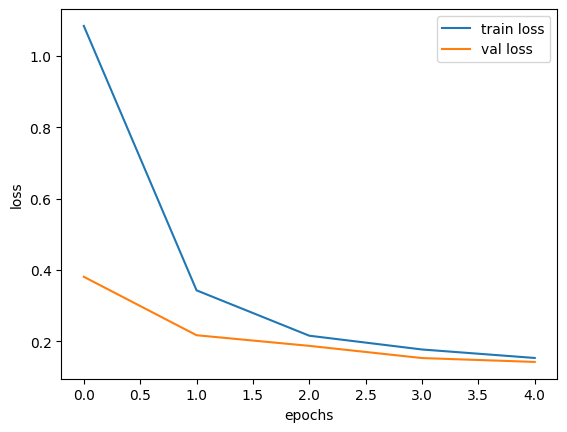

In [46]:
# Display the loss and validation loss graph
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.plot(epochs, loss, label='train loss')
plt.plot(epochs, val_loss, label='val loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [55]:
model.evaluate(X_train, y_train)

118/118 [==============================] - 1s 8ms/step - loss: 0.1227 - accuracy: 0.9595


[0.1226683035492897, 0.9594882726669312]

In [47]:
y_pred = model.predict(X_test)

58/58 [==============================] - 1s 4ms/step


In [57]:
accuracy_score=model.evaluate(X_test, y_test)
print("Model Evaluation Accuracy:", round(accuracy_score[1]*100),"%")

58/58 [==============================] - 0s 7ms/step - loss: 0.1300 - accuracy: 0.9589
Model Evaluation Accuracy: 96 %


In [56]:
y_pred_labels = np.argmax(y_pred, axis=1)

In [49]:
y_test_labels = np.argmax(y_test, axis=1)

In [50]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test_labels, y_pred_labels)

In [51]:
print(accuracy*100,"% accuracy")

95.88744588744589 % accuracy


In [52]:
len(paths)

5600

In [53]:
paths[::500]

['/content/drive/MyDrive/kaggle/TESS Toronto emotional speech set data/OAF_Fear/OAF_back_fear.wav',
 '/content/drive/MyDrive/kaggle/TESS Toronto emotional speech set data/OAF_Sad/OAF_chain_sad.wav',
 '/content/drive/MyDrive/kaggle/TESS Toronto emotional speech set data/OAF_happy/OAF_base_happy.wav',
 '/content/drive/MyDrive/kaggle/TESS Toronto emotional speech set data/YAF_angry/YAF_bath_angry.wav',
 '/content/drive/MyDrive/kaggle/TESS Toronto emotional speech set data/YAF_happy/YAF_kite_happy.wav',
 '/content/drive/MyDrive/kaggle/TESS Toronto emotional speech set data/YAF_pleasant_surprised/YAF_kick_ps.wav',
 '/content/drive/MyDrive/kaggle/tess toronto emotional speech set data/TESS Toronto emotional speech set data/OAF_Pleasant_surprise/OAF_cool_ps.wav',
 '/content/drive/MyDrive/kaggle/tess toronto emotional speech set data/TESS Toronto emotional speech set data/OAF_angry/OAF_lid_angry.wav',
 '/content/drive/MyDrive/kaggle/tess toronto emotional speech set data/TESS Toronto emotional

**Predicting emotions on the test data**

In [91]:
pred=model.predict(X_test, batch_size=32, verbose=1)
pred

35/35 [==============================] - 0s 3ms/step


array([[1.17969576e-04, 2.16827739e-05, 9.99597847e-01, ...,
        2.08989422e-05, 9.12196483e-05, 1.14362983e-05],
       [9.78313744e-01, 1.00656551e-04, 1.29403220e-02, ...,
        3.20257648e-04, 1.16642227e-03, 3.95832933e-04],
       [3.31077399e-03, 1.45551166e-04, 2.95246253e-04, ...,
        1.45297299e-05, 4.15292801e-04, 3.54003823e-05],
       ...,
       [9.96893406e-01, 7.80571499e-05, 4.45684185e-04, ...,
        1.29074775e-04, 1.31456845e-03, 1.88655176e-04],
       [3.02092258e-06, 2.92616569e-05, 4.25720027e-05, ...,
        9.99896288e-01, 1.93963715e-05, 8.24694962e-06],
       [3.31607589e-06, 4.26214065e-05, 1.71546817e-05, ...,
        9.99905944e-01, 1.91175623e-05, 9.97297866e-06]], dtype=float32)

In [92]:
_pred=pred.argmax(axis=1)
_pred

array([2, 0, 3, ..., 0, 4, 4])